In [63]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [64]:
df=pd.read_csv('salary.csv',parse_dates=['DOJ'])
df.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [65]:
df.shape

(457, 9)

In [66]:
df.dtypes

Name         object
Team         object
Number        int64
Position     object
Age           int64
DOJ          object
Weight        int64
College      object
Salary      float64
dtype: object

In [67]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'DOJ', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [68]:
df.Team.unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [69]:
df.Position.unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [70]:
df.Position.value_counts()

SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [72]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [73]:
df.drop(['Name','Team','College','DOJ'],axis=1,inplace=True)

In [74]:
df.isnull().sum()

Number       0
Position     0
Age          0
Weight       0
Salary      11
dtype: int64

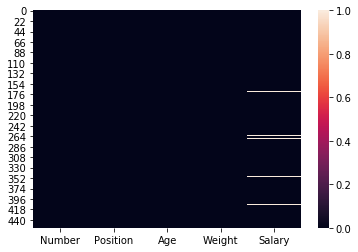

In [75]:
sns.heatmap(df.isnull())

In [76]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Salary']=imp.fit_transform(df['Salary'].values.reshape(-1,1))

In [77]:
df.isnull().sum()

Number      0
Position    0
Age         0
Weight      0
Salary      0
dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Position']=le.fit_transform(df['Position'])
df

,Number,Position,Age,Weight,Salary
0,0,2,25,180,7.730337e+06
1,99,3,25,235,6.796117e+06
2,30,4,27,205,4.842684e+06
3,28,4,22,185,1.148640e+06
4,8,1,29,231,5.000000e+06
...,...,...,...,...,...
452,41,1,20,234,2.239800e+06
453,8,2,26,203,2.433333e+06
454,25,2,24,179,9.000000e+05
455,21,0,26,256,2.900000e+06


In [79]:
df.corr()

,Number,Position,Age,Weight,Salary
Number,1.000000,-0.177229,0.028724,0.206921,-0.111436
Position,-0.177229,1.000000,-0.062992,-0.590791,-0.094108
Age,0.028724,-0.062992,1.000000,0.087183,0.210627
Weight,0.206921,-0.590791,0.087183,1.000000,0.135552
Salary,-0.111436,-0.094108,0.210627,0.135552,1.000000


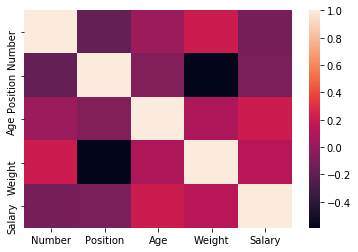

In [80]:
sns.heatmap(df.corr())

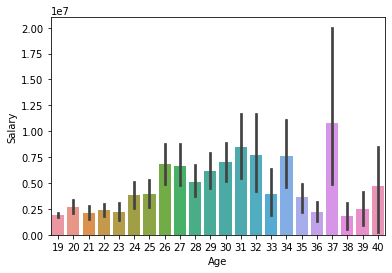

In [81]:
sns.barplot(x='Age',y='Salary',data=df)
plt.show()

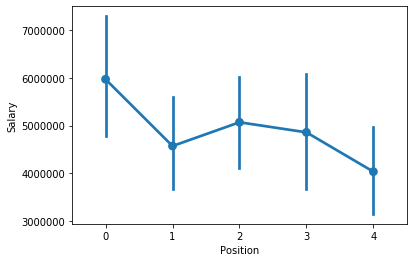

In [82]:
sns.pointplot(x='Position',y='Salary',data=df)
plt.show()

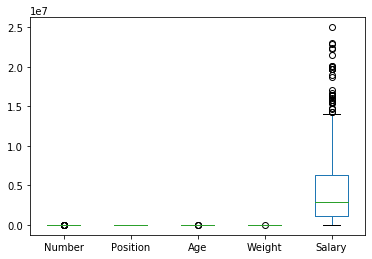

In [83]:
df.plot.box()

In [84]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df1=df[(z<3).all(axis=1)]
print(df1.shape)

(457, 5)
(443, 5)


In [85]:
df=df1

In [86]:
df.skew()

Number      0.801953
Position   -0.032205
Age         0.654542
Weight      0.092816
Salary      1.501286
dtype: float64

In [87]:
for col in df.columns:
    if df.skew().loc[col] >0.55:
        df[col]=np.log1p(df[col])  

In [88]:
df.skew()

Number     -0.724778
Position   -0.032205
Age         0.307181
Weight      0.092816
Salary     -0.482394
dtype: float64

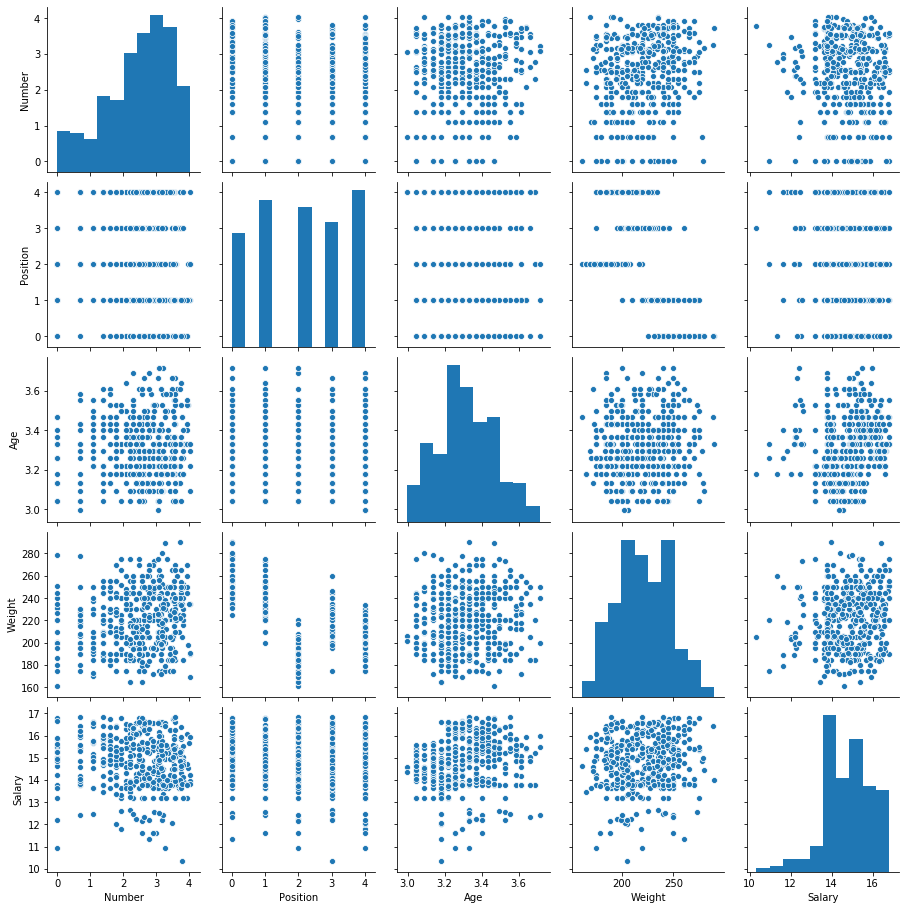

In [89]:
sns.pairplot(df)

In [90]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [91]:
x.shape

(443, 4)

In [92]:
y.shape

(443,)

In [93]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

In [94]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
x= scale.fit_transform(x)

In [95]:
x

array([[0.        , 0.5       , 0.36549139, 0.14728682],
       [0.85308998, 1.        , 0.46872887, 0.34108527],
       [0.83652214, 1.        , 0.19469796, 0.18604651],
       ...,
       [0.80939426, 0.5       , 0.31085425, 0.13953488],
       [0.76789376, 0.        , 0.41806625, 0.73643411],
       [0.79965083, 0.        , 0.41806625, 0.54263566]])

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=80)
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("r2_score corresponding to random state:",r_state, " is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print("max r2 score corresponding to",final_r_state," is ",max_r_score)     

r2_score corresponding to random state: 42  is:  0.09615908623374358
r2_score corresponding to random state: 43  is:  0.05733893711389215
r2_score corresponding to random state: 44  is:  0.006672199684307212
r2_score corresponding to random state: 45  is:  -0.060542513289047806
r2_score corresponding to random state: 46  is:  -0.0847568656497728
r2_score corresponding to random state: 47  is:  -0.0334000000138559
r2_score corresponding to random state: 48  is:  0.056934778539730835
r2_score corresponding to random state: 49  is:  -0.006139560788870124
r2_score corresponding to random state: 50  is:  -0.0167652777796381
r2_score corresponding to random state: 51  is:  0.021668459236917625
r2_score corresponding to random state: 52  is:  0.004583022105049128
r2_score corresponding to random state: 53  is:  0.03803109617950651
r2_score corresponding to random state: 54  is:  0.06263149486331532
r2_score corresponding to random state: 55  is:  -0.06710621877311196
r2_score corresponding to

In [97]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), x,y,cv=5,scoring="r2").mean()

0.021109646897279188

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
ls=Lasso()
grid_param ={"alpha":[0.001,0.01,0.1,1]}
gd_sr = GridSearchCV(ls,grid_param,cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'alpha': 0.001}


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
rd=Ridge()
grid_param ={"alpha":[0.001,0.01,0.1,1]}
gd_sr = GridSearchCV(rd,grid_param,cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'alpha': 1}


In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR()
grid_param ={'kernel': ('linear','poly','rbf'), 'C':[1,10]}
gd_sr = GridSearchCV(svr,grid_param)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'C': 1, 'kernel': 'linear'}


In [101]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
grid_param ={'n_neighbors':range(1,30)}
gd_sr = GridSearchCV(knn,grid_param)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_neighbors': 29}


In [102]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
grid_param ={'criterion':['mse','friedman_mse','mae']}
gd_sr = GridSearchCV(dtr,grid_param)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'friedman_mse'}


In [103]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
grid_param={"n_estimators":[10,100,500,1000]}
gd_sr = GridSearchCV(rf,grid_param,cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_estimators': 500}


In [104]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
grid_param={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gd_sr = GridSearchCV(gb,grid_param,cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'learning_rate': 0.01, 'n_estimators': 100}


In [105]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
grid_param={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lr,dtr,knn,svr,ls]}
gd_sr = GridSearchCV(ab,grid_param,cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'base_estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'learning_rate': 0.001, 'n_estimators': 100}


In [106]:
model=[Lasso(alpha=0.001),Ridge(alpha=1),SVR(C=1,kernel='linear'),KNeighborsRegressor(n_neighbors=29),DecisionTreeRegressor(criterion='mse')]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('r2 score of',m,'is:')
    print(r2_score(y_test,predm))
    print('\n')
    

r2 score of Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is:
0.07087962979028883


r2 score of Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001) is:
0.0715517364545607


r2 score of SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is:
0.09580710005111315


r2 score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                    weights='uniform') is:
0.07663232443145751


r2 score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decre

In [107]:
print("Mean r2 score for LassoRegression:",cross_val_score(Lasso(), x,y,cv=5,scoring="r2").mean())
print("Mean r2 score for RidgeRegression:",cross_val_score(Ridge(), x,y,cv=5,scoring="r2").mean())
print("Mean r2 score for SVR:",cross_val_score(SVR(), x,y,cv=5,scoring="r2").mean())
print("Mean r2 score for KNeighborsRegressor:",cross_val_score(KNeighborsRegressor(), x,y,cv=5,scoring="r2").mean())
print("Mean r2 score for DecisionTreeRegression:",cross_val_score(DecisionTreeRegressor(), x,y,cv=5,scoring="r2").mean())

Mean r2 score for LassoRegression: -0.013176003960282356
Mean r2 score for RidgeRegression: 0.022871433210567726
Mean r2 score for SVR: 0.013137117668259623
Mean r2 score for KNeighborsRegressor: -0.039168885971983
Mean r2 score for DecisionTreeRegression: -0.949180274253471


In [108]:
model=[RandomForestRegressor(n_estimators=500,random_state=80),GradientBoostingRegressor(learning_rate= 0.01,n_estimators= 100),AdaBoostRegressor(base_estimator=svr,learning_rate=0.001,n_estimators=10)]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('r2 score of',m,'is:')
    print(r2_score(y_test,predm))
    print('\n')

r2 score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=80, verbose=0, warm_start=False) is:
-0.2466825820600107


r2 score of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
           

In [109]:
print("Mean r2 score for RandomForestRegression:",cross_val_score(RandomForestRegressor(), x,y,cv=5,scoring="r2").mean())
print("Mean r2 score for GradientBoostingRegression:",cross_val_score(GradientBoostingRegressor(), x,y,cv=5,scoring="r2").mean())
print("Mean r2 score for AdaBoostRegression:",cross_val_score(AdaBoostRegressor(), x,y,cv=5,scoring="r2").mean())


Mean r2 score for RandomForestRegression: -0.11241368551908941
Mean r2 score for GradientBoostingRegression: -0.09194302000843443
Mean r2 score for AdaBoostRegression: -0.04509332320575674


In [111]:
print('errror:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:' ,mean_squared_error(y_test,pred))
print('Root Mean absolute Error:',np.sqrt(mean_squared_error(y_test,pred)))

errror:
Mean absolute error: 0.9883429908023509
Mean squared error: 1.4587848367071685
Root Mean absolute Error: 1.2078016545390093


In [ ]:
from sklearn.externals import joblib
joblib.dump(lr, 'salary_lr.pkl')